In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from google.colab import files
uploaded = files.upload()

Saving cleaned_tracks_both.csv to cleaned_tracks_both.csv


In [2]:
track_table = pd.read_csv("cleaned_tracks_both.csv")
track_table.dropna(inplace=True)

In [3]:
track_table.groupby("master_popular_genre").track_id.count()

master_popular_genre
country    10005
hiphop     10728
house       6529
indie       7673
pop        17277
r&b         5505
rock        8967
Name: track_id, dtype: int64

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_numerics = pd.concat([track_table.select_dtypes(include=[np.number]),track_table['master_popular_genre']],axis=1, sort=False)

In [5]:
data_numerics.head()

,track_pop,track_year,duration_ms,time_signature,key,loudness,energy,speechiness,acousticness,mode,tempo,valence,danceability,instrumentalness,liveness,master_popular_genre
0,50,2011,247010,4,2,-9.841,0.41200,0.0357,0.94300,1,88.113,0.193,0.167,0.000121,0.7570,pop
1,44,2011,353667,4,11,-7.257,0.72700,0.0462,0.03010,0,87.349,0.391,0.485,0.758000,0.1630,rock
2,37,2011,163000,3,9,-35.213,0.00385,0.0449,0.99500,0,141.201,0.117,0.228,0.917000,0.0858,rock
3,41,2011,253991,3,7,-9.827,0.30500,0.0318,0.93600,1,85.786,0.446,0.230,0.000002,0.7440,pop
4,42,2011,294613,4,3,-5.242,0.95400,0.0607,0.00894,0,163.995,0.287,0.454,0.000000,0.0659,rock


In [6]:
#track_table_numerics = pd.concat([data_numerics.drop(['master_popular_genre'],axis=1), pd.get_dummies(data_numerics['master_popular_genre'])], axis=1, sort= False)

track_table_dummies = pd.get_dummies(data_numerics,columns=['key','time_signature',],drop_first=True)
track_table_dummies = track_table_dummies.drop('loudness', axis=1)


In [7]:
track_table_dummies.head()

,track_pop,track_year,duration_ms,energy,speechiness,acousticness,mode,tempo,valence,danceability,instrumentalness,liveness,master_popular_genre,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,50,2011,247010,0.41200,0.0357,0.94300,1,88.113,0.193,0.167,0.000121,0.7570,pop,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,44,2011,353667,0.72700,0.0462,0.03010,0,87.349,0.391,0.485,0.758000,0.1630,rock,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,2011,163000,0.00385,0.0449,0.99500,0,141.201,0.117,0.228,0.917000,0.0858,rock,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,41,2011,253991,0.30500,0.0318,0.93600,1,85.786,0.446,0.230,0.000002,0.7440,pop,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,42,2011,294613,0.95400,0.0607,0.00894,0,163.995,0.287,0.454,0.000000,0.0659,rock,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
genre = track_table_dummies['master_popular_genre']
track_table_dummies.drop('master_popular_genre', axis=1,inplace = True)
track_table_dummies.insert(0, 'master_popular_genre', genre)

In [9]:
track_table_dummies.head()

,master_popular_genre,track_pop,track_year,duration_ms,energy,speechiness,acousticness,mode,tempo,valence,danceability,instrumentalness,liveness,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,pop,50,2011,247010,0.41200,0.0357,0.94300,1,88.113,0.193,0.167,0.000121,0.7570,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,rock,44,2011,353667,0.72700,0.0462,0.03010,0,87.349,0.391,0.485,0.758000,0.1630,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,rock,37,2011,163000,0.00385,0.0449,0.99500,0,141.201,0.117,0.228,0.917000,0.0858,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,pop,41,2011,253991,0.30500,0.0318,0.93600,1,85.786,0.446,0.230,0.000002,0.7440,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,rock,42,2011,294613,0.95400,0.0607,0.00894,0,163.995,0.287,0.454,0.000000,0.0659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
X = track_table_dummies.iloc[:,1:]
y = track_table_dummies.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
y_train.unique()

array(['house', 'pop', 'hiphop', 'r&b', 'country', 'rock', 'indie'],
      dtype=object)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
gb_param_grid = {
       #'n_estimators': range(50, 400, 50),
       'n_estimators': [350],
       #'max_depth':range(3,8),
       'max_depth':[6],
       #'learning_rate' : [0.1,0.3],
       'learning_rate' : [0.1],
       #'min_samples_split': [0.05, 0.1]
       'min_samples_split': [0.05]

}
grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=3, verbose=2).fit(X_train, y_train)


# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))
print("Model Accuracy:", accuracy_score(y_test,grid.predict(X_test)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350, total= 7.8min
[CV] learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350, total= 7.8min
[CV] learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350 
[CV]  learning_rate=0.1, max_depth=6, min_samples_split=0.05, n_estimators=350, total= 7.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 23.4min finished


The best score is 0.578562032708
The best hyper parameter setting is {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 0.05, 'n_estimators': 350}
Model Accuracy: 0.577933290920658


Accuracy predicting Country: 0.6492578339747114
Accuracy predicting HipHop: 0.6536678483774202
Accuracy predicting House: 0.668248694826768
Accuracy predicting Indie: 0.5441306266548985
Accuracy predicting Pop: 0.5068666140489345
Accuracy predicting R&B: 0.476687543493389
Accuracy predicting Rock: 0.5563380281690141


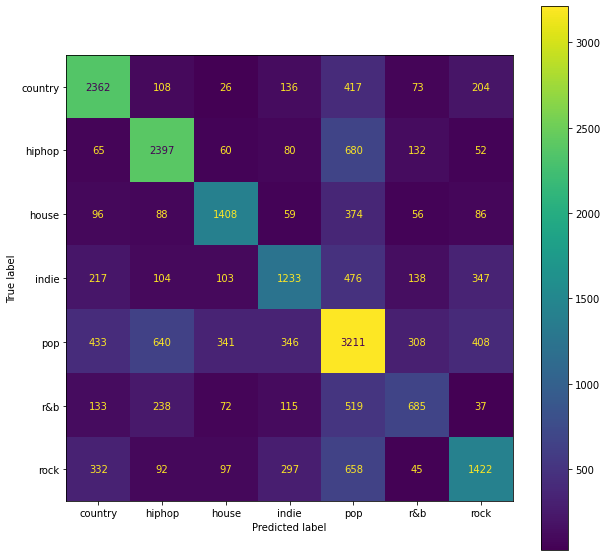

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
genre_order = ['country', 'hiphop', 'house', 'indie', 'pop', 'r&b', 'rock']

conf_matrix = confusion_matrix(y_test, grid.predict(X_test), labels=genre_order)
fig, ax = plt.subplots(figsize=(10, 10))
print(plot_confusion_matrix(X=X_test,y_true=y_test, labels=genre_order,estimator=grid, ax=ax,values_format = 'd'))
print("Accuracy predicting Country:", conf_matrix[0,0]/(sum(conf_matrix[:,0])))
print("Accuracy predicting HipHop:", conf_matrix[1,1]/(sum(conf_matrix[:,1])))
print("Accuracy predicting House:", conf_matrix[2,2]/(sum(conf_matrix[:,2])))
print("Accuracy predicting Indie:", conf_matrix[3,3]/(sum(conf_matrix[:,3])))
print("Accuracy predicting Pop:", conf_matrix[4,4]/(sum(conf_matrix[:,4])))
print("Accuracy predicting R&B:", conf_matrix[5,5]/(sum(conf_matrix[:,5])))
print("Accuracy predicting Rock:", conf_matrix[6,6]/(sum(conf_matrix[:,6])))

Text(0.5, 1.0, 'Proportional Genre Confusion Matrix')

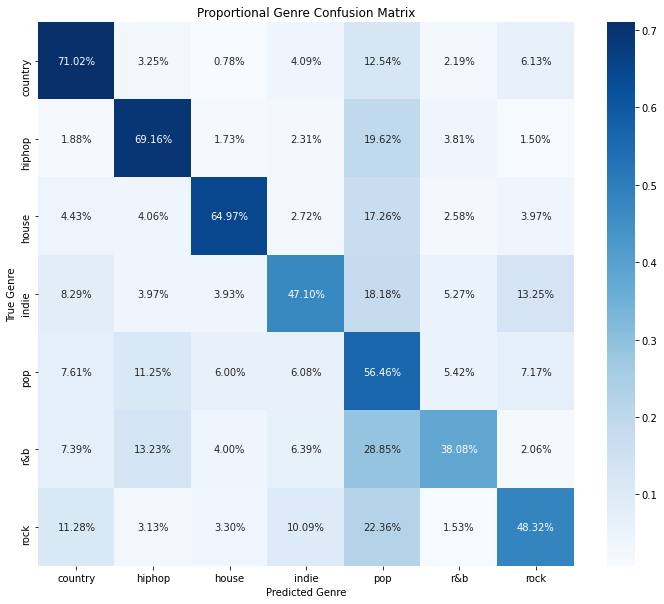

In [118]:
fig, ax = plt.subplots(figsize=(12,10)) 

sns.heatmap(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], annot=True,
            fmt='.2%', cmap='Blues',xticklabels=genre_order,yticklabels=genre_order, ax=ax)
ax.set(xlabel='Predicted Genre', ylabel='True Genre')
ax.set_title("Proportional Genre Confusion Matrix")

In [78]:
for count,genre_preds in enumerate(conf_matrix):
  print("True Genre:", genre_order[count])
  genre_preds[list(genre_preds).index(max(genre_preds))] = 0
  incorrect_guess = genre_order[list(genre_preds).index(max(genre_preds))]
  print("Most Common Incorrect Prediction:", incorrect_guess)
  print("Percent of All Incorrect Predictions as", incorrect_guess, (max(genre_preds) / sum(genre_preds)))
  print()

True Genre: country
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.43257261410788383

True Genre: hiphop
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.6361085126286249

True Genre: house
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.4927536231884058

True Genre: indie
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.3436823104693141

True Genre: pop
Most Common Incorrect Prediction: hiphop
Percent of All Incorrect Predictions as hiphop 0.25848142164781907

True Genre: r&b
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.4658886894075404

True Genre: rock
Most Common Incorrect Prediction: pop
Percent of All Incorrect Predictions as pop 0.43261012491781725



In [42]:
# Add prediction of 2nd highest probability genre
two_preds = []
for prediction in grid.predict_proba(X_test):
  prediction = list(prediction)
  two_maxes = []
  two_maxes.append(prediction.index(max(prediction)))
  prediction[prediction.index(max(prediction))] = 0
  two_maxes.append(prediction.index(max(prediction)))
  two_preds.append(two_maxes)

In [44]:
# Convert probability to genre name
for pred in two_preds:
  pred[0] = genre_order[pred[0]]
  pred[1] = genre_order[pred[1]]

In [45]:
# Create list to evaluate accuracy
in_list = []
for i in range(0,len(two_preds)):
  in_list.append(int(list(y_test)[i] in two_preds[i]))

In [46]:
print("Accuracy:" , sum(in_list) / len(in_list))

Accuracy: 0.7844678723984367


In [47]:
pred_correctly = []
true_genre = []
predicted_genre = []

for i in range(0,len(y_test)):
  pred_correctly.append(in_list[i])
  true_genre.append(list(y_test)[i])
  predicted_genre.append(two_preds[i])

prediction_frame = pd.DataFrame({"Predicted_Correctly":pred_correctly,
                                 "True Genre": true_genre,
                                 "Predicted Genres": predicted_genre,
                                 "Track Name": track_table.track_name[y_test.index],
                                 "Artist Name": track_table.art_name[y_test.index]})

In [48]:
display(prediction_frame[prediction_frame.Predicted_Correctly == 0])

,Predicted_Correctly,True Genre,Predicted Genres,Track Name,Artist Name
2885,0,country,"[hiphop, pop]",Smoke Stack,The Lacs
52843,0,hiphop,"[country, house]",Tattoo,Kevin Abstract
34983,0,pop,"[country, rock]",Start A Riot,BANNERS
65658,0,rock,"[country, pop]",Midnight Thoughts,Set It Off
57048,0,r&b,"[pop, hiphop]",Dingo X BIBI - she got it,BIBI
...,...,...,...,...,...
32184,0,pop,"[rock, country]",Breathless,Small Black
7861,0,country,"[pop, r&b]",Mother,Sugarland
19231,0,hiphop,"[pop, rock]",I've Been Waiting (feat. ILOVEMAKONNEN) - Orig...,Lil Peep
9693,0,country,"[pop, r&b]",A ROCK,HARDY


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

track_table_clusters = track_table_dummies.drop('master_popular_genre', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(track_table_clusters)
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca.explained_variance_ratio_.cumsum()

array([0.08958415, 0.1575384 , 0.21553338, 0.26477364, 0.30899659,
       0.35096779, 0.39212482, 0.4329397 , 0.47362612, 0.51398291,
       0.55421736, 0.5943036 , 0.63399609, 0.6725887 , 0.71077431,
       0.7483482 , 0.78527038, 0.82005052, 0.85417297, 0.88708408,
       0.91616332, 0.94203932, 0.96418348, 0.98500313, 0.99552794,
       0.99997824, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

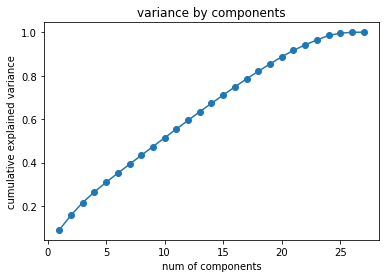

In [99]:
plt.plot(range(1,28), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('variance by components')
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')

In [98]:
KMeans(n_clusters=8,X_test)

array([[ 0.16276671, -1.57310395,  0.30558392, ..., -0.23247047,
         0.26843167, -0.10872003],
       [-0.24085285, -1.57310395,  1.85244189, ..., -0.23247047,
         0.26843167, -0.10872003],
       [-0.71174234, -1.57310395, -0.91282216, ...,  4.30162162,
        -3.72534285, -0.10872003],
       ...,
       [ 0.16276671,  1.5659279 , -0.49127483, ..., -0.23247047,
         0.26843167, -0.10872003],
       [ 0.6336562 ,  1.5659279 ,  0.52124514, ..., -0.23247047,
         0.26843167, -0.10872003],
       [ 0.16276671,  1.5659279 ,  0.02529686, ..., -0.23247047,
         0.26843167, -0.10872003]])